## Content
- [Overview the Data Set](#Overview-the-Data-Set)  
- [Logistic Regression](#Logistic-Regression)  
    + [[1] Initializing parameters](#[1]-Initializing-parameters)
    + [[2] Forward propagation](#[2]-Forward-propagation)
    + [[3] Optimization Algorithm with Gradient Descent](#[3]-Optimization-Algorithm-with-Gradient-Descent)
    + [[4] Prediction](#[4]-Prediction)
- [Logistic Regression with Sklearn](#Logistic-Regression-with-Sklearn)  


## Overview the Data Set

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import warnings
# filter warnings - warning 무시하기
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sign-language-digits-dataset/Y.npy
/kaggle/input/sign-language-digits-dataset/X.npy
/kaggle/input/sign-language-digits-dataset/Sign-language-digits-dataset/Y.npy
/kaggle/input/sign-language-digits-dataset/Sign-language-digits-dataset/X.npy


(-0.5, 63.5, 63.5, -0.5)

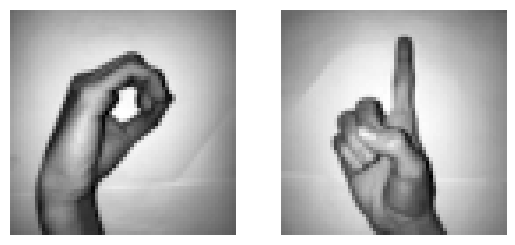

In [2]:
# load the dataset
# image 
x_l = np.load('/kaggle/input/sign-language-digits-dataset/X.npy')
# label 
y_l = np.load('/kaggle/input/sign-language-digits-dataset/Y.npy')

img_size = 64

# visualization - 2개의 0, 1이미지를 나란히 출력
# subplot을 1행 2열로 나누고 1번째 subplot 설정
plt.subplot(1, 2, 1)
# 0 image
# grayscale image 출력 - cmap='gray'
plt.imshow(x_l[260].reshape(img_size, img_size), cmap='gray')
plt.axis('off')  # axis 보이지 않게 설정

# 2번째 subplot 설정
plt.subplot(1, 2, 2)
# 1 image
# grayscale image 출력 - cmap='gray'
plt.imshow(x_l[900].reshape(img_size, img_size), cmap='gray')
plt.axis('off')  # axis 보이지 않게 설정

In [3]:
print(x_l.shape, y_l.shape)

(2062, 64, 64) (2062, 10)


In [4]:
# Join a sequence of arrays along an row axis -> zero: 0 ~ 204, one: 205 ~ 410 
# 첫 번째 차원 기준으로 이어붙이기 -> 결과는 205+205=410를 첫 번째 차원으로 가지는 3차원 배열
X = np.concatenate((x_l[204:409], x_l[822:1027]), axis=0) 
# 0 array (행 벡터)
z = np.zeros(205)
# 1 array (행 벡터)
o = np.ones(205)

# label(target) arrray 이어붙인 행 벡터 -> 열 벡터로 reshape
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print("X shape: ", X.shape)
print("Y shape: ", Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


In [5]:
print(x_l[204:409].shape, x_l[822:1027].shape)

(205, 64, 64) (205, 64, 64)


In [6]:
# create train set, test set - x_train, y_train, x_test, y_test
from sklearn.model_selection import train_test_split

# test = 15% and train = 75%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
print(number_of_train, number_of_test)

348 62


In [7]:
# X : 3D->2D flatten - 딥러닝 모델의 input으로 사용하기 위해
# 2차원으로 저장된 64*64 이미지의 각 픽셀을 1차원으로 펼치기
# reshape(348, 64*64)
X_train_flatten = X_train.reshape(number_of_train, X_train.shape[1] * X_train.shape[2])
# reshape(62, 64*64)
X_test_flatten = X_test.reshape(number_of_test, X_test.shape[1] * X_test.shape[2])

print("X train flatten", X_train_flatten.shape)
print("X test flatten", X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


In [8]:
# transpose
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T

print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


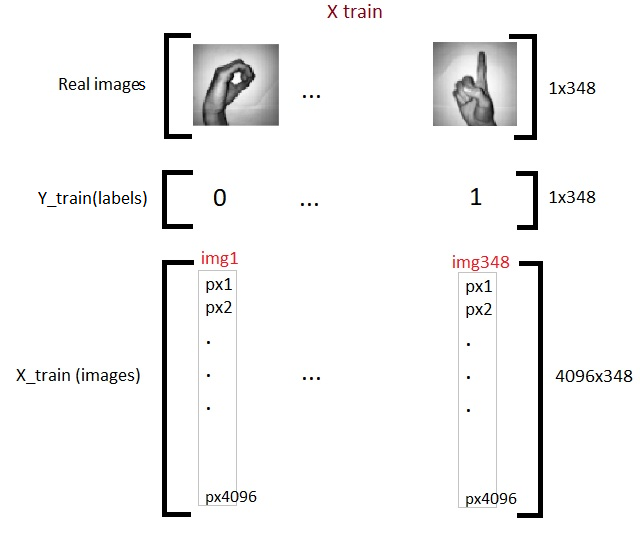

## Logistic Regression

### [1] Initializing parameters

In [9]:
# initialize parameters
def initialize_weights_and_bias(dimension):
    # initial weights = 0.01
    w = np.full((dimension, 1), 0.01)
    # initial bias = 0
    b = 0.0
    return w, b

# w,b = initialize_weights_and_bias(4096)

### [2] Forward Propagation

In [10]:
# sigmoid function
def sigmoid(z):
    y_head = 1 / (1 + np.exp(-z))
    return y_head

In [11]:
# Forward propagation
# 1) find z = w.T*x+b
# 2) y_head = sigmoid(z)
# 3) loss(error) = loss(y, y_head)
# 4) cost = sum(loss)

def forward_propagation(w, b, x_train, y_train):
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    # x_train.shape[1] is for scaling
    cost = (np.sum(loss)) / x_train.shape[1]      
    return cost 

### [3] Optimization Algorithm with Gradient Descent

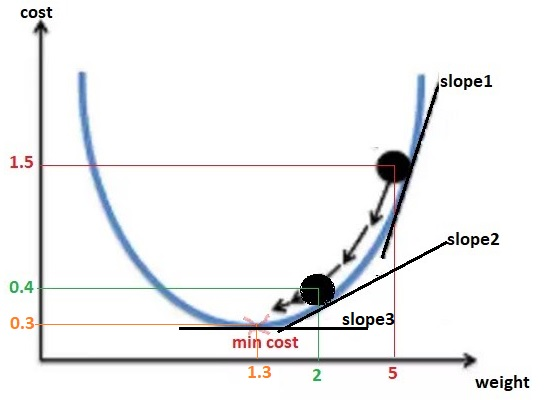

In [12]:
# Forward propagation & Backward propagation 
def forward_backward_propagation(w, b, x_train, y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    
    # backward propagation
    
    # dw
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]  # x_train.shape[1] is for scaling
    # db
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]  # x_train.shape[1] is for scaling                 
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    
    return cost, gradients

In [13]:
# updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate, number_of_iteration):
    cost_list = []
    cost_list2 = []
    index = []
    
    # 경사하강법 단계 반복 - for문
    for i in range(number_of_iteration):
        # Forward propagation & Backward propagation -> find cost, gradients
        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost)
        
        # update(learn) parameters - w, b 갱신
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        # 10번 반복할 때마다(0, 10, 20, ...)
        if i % 10 == 0:
            # 리스트에 cost 추가
            cost_list2.append(cost)
            index.append(i)
            # cost 출력
            print("Cost after iteration %i: %f" %(i, cost))
            
    # updated parameters weights and bias - 최종 w, b
    parameters = {"weight": w, "bias": b}
    
    # visualization - cost를 그래프로 나타내기
    plt.plot(index, cost_list2)
    plt.xticks(index, rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

# parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate = 0.009, number_of_iteration = 200)

### [4] Prediction

In [14]:
# prediction
def predict(w,b,x_test):
    # input for forward propagation: x_test
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1, x_test.shape[1]))
    # if z <= 0.5, prediction y_head=0
    # if z > 0.5, prediction y_head=1
    for i in range(z.shape[1]):
        if z[0,i] <= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

# predict(parameters["weight"], parameters["bias"], x_test)

Cost after iteration 0: 14.014222
Cost after iteration 10: 2.544689
Cost after iteration 20: 2.577950
Cost after iteration 30: 2.397999
Cost after iteration 40: 2.185019
Cost after iteration 50: 1.968348
Cost after iteration 60: 1.754195
Cost after iteration 70: 1.535079
Cost after iteration 80: 1.297567
Cost after iteration 90: 1.031919
Cost after iteration 100: 0.737019
Cost after iteration 110: 0.441355
Cost after iteration 120: 0.252278
Cost after iteration 130: 0.205168
Cost after iteration 140: 0.196168


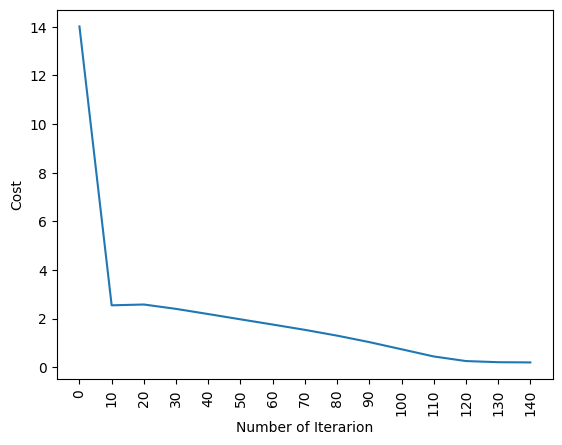

train accuracy: 92.816091954023 %
test accuracy: 93.54838709677419 %


In [15]:
# 최종 코드
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # 4096
    w,b = initialize_weights_and_bias(dimension)
    # updating(learning) parameters
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate, num_iterations)
    
    # prediction
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # print train/test errors (accuracy)
    # 예측값과 실제값이 얼마나 차이나는지 - 차이가 많이 날수록 accuracy는 작아짐
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 150)

## Logistic Regression with Sklearn

In [16]:
# implemented logistic regression in sklearn library
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42, max_iter= 150)

# print accuracy
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.967741935483871 
train accuracy: 1.0 
